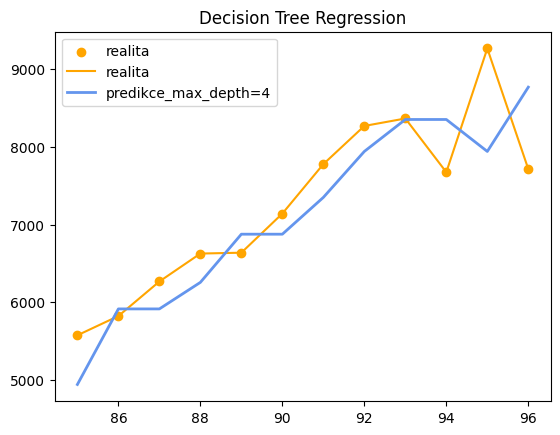

R2: 0.8217213508655201
Root Mean Squared Error: 607.3667317357095
CPU times: total: 250 ms
Wall time: 298 ms


In [75]:
%%time 
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report


df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])

df_train =df.drop(df.index[-12:])
df_train =df.drop(df.index[-12:])

df_test = df.drop(df.index[:-12])
df_test = df.drop(df.index[:-12])
df_test_graf = df_test

X_train = df_train[["aktivni-1","nove-1"]]
y_train =  df_train["aktivni"]

X_test = df_test[["aktivni-1","nove-1"]]
y_test = df_test['aktivni']
#>> trenink
#?? dalsi args v dokumentaci: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
max_depth = 4
dtr = DecisionTreeRegressor(max_depth=max_depth)
dtr.fit(X_train, y_train)

#>> evaluace
y_pred = dtr.predict(X_test)


#>> graf
plt.figure()
plt.scatter(X_test.index, y_test,c="orange", label="realita")
plt.plot(X_test.index, y_test,c="orange", label="realita")
plt.plot(X_test.index, y_pred, color="cornflowerblue", label=f"predikce_max_depth={max_depth}", linewidth=2)
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#>>metriky
print("R2:", np.sqrt(metrics.r2_score(y_test, y_pred)))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

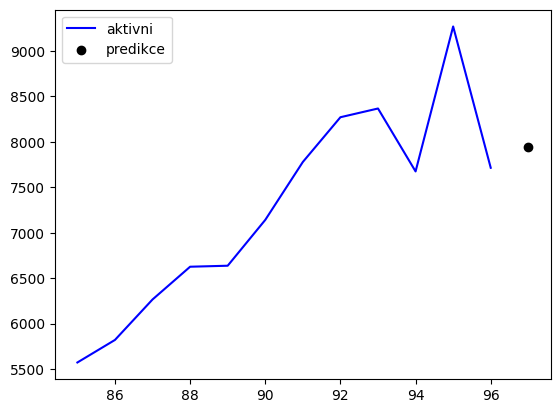

[7941.58823529]


In [82]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df_orig = df.drop(df.index[-12:])

#df = (df-df.min())/(df.max()-df.min())
df_new = df.drop(df.index[:-12])
df_new = df_new.drop(df_new.index[-11:])
df_train = df.drop(df.index[-12:])

x_new = df_new[["aktivni-1", "nove-1"]]
#>> predikce
y_pred = dtr.predict(x_new)
#>> graf
#* realita
plt.plot(X_test.index, df_test['aktivni'],label="aktivni",color="blue")
#* predikce
plt.scatter(x_new.index, y_pred, label='predikce', color="black")
plt.legend()
plt.show()
print(y_pred)